<h1><b>Data Analysis Project using Python</b></h1>

Name: Nabillah Deris Zulaeka

Email: M180B4KX3193@bangkit.academy

ID Dicoding: nabillahderis

<h1><b>Questions regarding to the anlysis</b></h1>

1. How does the seasonality affect bike rentals?
2. Are there significant differences in usage based on weather?
3. What is the proportion of casual vs. registered users?
4. How do bike rental counts differ between the years 2011 and 2012?
5. Is there a correlation between temperature and total bike rentals?
6. What is the number of rentals at certain hours?

<h1><b>Data Wrangling</b></h1>

Data wrangling is the process of cleaning, transforming, and integrating data to make it suitable for analysis. It's a crucial step in the data science pipeline, often referred to as "data munging" or "data janitoring." Data wrangling involves tasks like handling missing values, correcting errors, converting data types, and combining data from different sources. By effectively wrangling data, data scientists can ensure that their analyses are accurate, reliable, and valuable.

<h3><b>Import library</b></h3>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>Import data</b></h3>

In [45]:
# Import data day
day_df = pd.read_csv("data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [46]:
# Import data hour
hour_df = pd.read_csv("data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


<h3><b>Assessing Data day_df</b></h3>

In [47]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There are data types that do not match, namely in the attributes dteday, season, year, month, holiday, weekday, workingday, and weathersit. The reasons why the data types are not appropriate are:
1. dteday = the dteday attribute should have the datetime data type.
2. season = the season attribute should have a category data type because there are 4 season categories in the data, namely 1: spring, 2: summer, 3: fall, 4: winter
3. yr = should have a category data type because there are 2 year categories in the data, namely 2011 and 2012.
4. mnth = should have a category data type because there are 12 month categories in the data, namely January to December.
5. holiday = should have a category data type because this attribute has 2 types of categories, weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
6. weekday = should have a category data type because this attribute contains the day, namely Monday to Sunday.
7. workingday = should have a category data type because the attribute explains that 1 is a holiday or weekend and vice versa is 0
8. weathersit = should have a category data type because the attribute explains that 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [48]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no empty data

In [49]:
print("Number of duplications: ", day_df.duplicated().sum())

Number of duplications:  0


There are no duplications in day_df.

In [50]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


day_df is now clean and ready to use for analysis

<h3><b>Assessing data hour_df</b></h3>

In [51]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Similar to day_df, hour_df also have some mismatch data type on several atributes mention below:
There are data types that do not match, namely in the attributes dteday, season, year, month, holiday, weekday, workingday, and weathersit. The reasons why the data types are not appropriate are:

1. dteday = the dteday attribute should have the datetime data type.
2. season = the season attribute should have a category data type because there are 4 season categories in the data, namely 1: spring, 2: summer, 3: fall, 4: winter
3. yr = should have a category data type because there are 2 year categories in the data, namely 2011 and 2012.
4. mnth = should have a category data type because there are 12 month categories in the data, namely January to December.
5. hr = should have a category data type
6. holiday = should have a category data type because this attribute has 2 types of categories, weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
7. weekday = should have a category data type because this attribute contains the day, namely Monday to Sunday.
8. workingday = should have a category data type because the attribute explains that 1 is a holiday or weekend and vice versa is 0
9. weathersit = should have a category data type because the attribute explains that 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [52]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
print("Number of duplications: ", hour_df.duplicated().sum())

Number of duplications:  0


In [54]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<h3><b>Data Cleaning for day_df</b></h3>

<b>Convert all attributes that are not align with the data type given on https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset</b>

In [55]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['yr'] = day_df.yr.astype('category')
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [56]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

The data type is now align with the data types given on the UCI website.

<b>Categorize the data for attributes with category data type</b>

In [57]:
day_df['season'] = day_df['season'].cat.rename_categories({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
day_df['yr'] = day_df['yr'].cat.rename_categories({0: '2011', 1: '2012'})
day_df['mnth'] = day_df['mnth'].cat.rename_categories({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                                       7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
day_df['holiday'] = day_df['holiday'].cat.rename_categories({0: 'Not Holiday', 1: 'Holiday'})
day_df['weekday'] = day_df['weekday'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                             4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['workingday'] = day_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})
day_df['weathersit'] = day_df['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'})

In [58]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,January,Not Holiday,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,winter,2011,January,Not Holiday,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,winter,2011,January,Not Holiday,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,winter,2011,January,Not Holiday,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,winter,2011,January,Not Holiday,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,2012,December,Not Holiday,Thursday,Yes,Misty,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,winter,2012,December,Not Holiday,Friday,Yes,Misty,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,winter,2012,December,Not Holiday,Saturday,No,Misty,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,winter,2012,December,Not Holiday,Sunday,No,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


day_df is now clean and ready to use for analysis.

<h3><b>Data Cleaning for hour_df</b></h3>

<b>Convert all attributes that are not align with the data type given on https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset</b>

In [59]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['hr'] = hour_df.hr.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [60]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

The data type is now align with the data types given on the UCI website.

<b>Categorize the data for attributes with category data type</b>

In [61]:
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
hour_df['yr'] = hour_df['yr'].cat.rename_categories({0: '2011', 1: '2012'})
hour_df['mnth'] = hour_df['mnth'].cat.rename_categories({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                                       7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
hour_df['holiday'] = hour_df['holiday'].cat.rename_categories({0: 'Not Holiday', 1: 'Holiday'})
hour_df['weekday'] = hour_df['weekday'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                                                             4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['workingday'] = hour_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})
hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'})

In [62]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,January,0,Not Holiday,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,January,1,Not Holiday,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,January,2,Not Holiday,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,January,3,Not Holiday,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,January,4,Not Holiday,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,December,19,Not Holiday,Monday,Yes,Misty,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,December,20,Not Holiday,Monday,Yes,Misty,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,December,21,Not Holiday,Monday,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,December,22,Not Holiday,Monday,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


hour_df is now clean and ready to use for analysis.

<h1><b>Exploratory Data Analysis</b></h1>

<h3><b>Categorizing total rental bikes with season & year; weathersit & year using hour_df</b></h3>

In [63]:
hour_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/735254714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()


,season,yr,cnt
0,winter,2011,405
1,winter,2012,801
2,spring,2011,638
3,spring,2012,957
4,summer,2011,651
5,summer,2012,977
6,fall,2011,625
7,fall,2012,967


In [64]:
hour_df.groupby(["weathersit", "yr"]).agg({"cnt": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/3738160301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["weathersit", "yr"]).agg({"cnt": "max"}).reset_index()


,weathersit,yr,cnt
0,Clear,2011,651
1,Clear,2012,977
2,Misty,2011,604
3,Misty,2012,957
4,Light Snow,2011,579
5,Light Snow,2012,891
6,Heavy Rain,2011,36
7,Heavy Rain,2012,164


<h3><b>Categorizing casual & registered users with season & year; weathersit & year using hour_df</b></h3>

In [65]:
hour_df.groupby(["season", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/209991233.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["season", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()


,season,yr,casual,registered
0,winter,2011,175,393
1,winter,2012,367,681
2,spring,2011,240,555
3,spring,2012,361,782
4,summer,2011,248,567
5,summer,2012,350,886
6,fall,2011,272,553
7,fall,2012,362,876


In [66]:
hour_df.groupby(["weathersit", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/443386001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["weathersit", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()


,weathersit,yr,casual,registered
0,Clear,2011,272,567
1,Clear,2012,367,886
2,Misty,2011,245,540
3,Misty,2012,350,822
4,Light Snow,2011,181,509
5,Light Snow,2012,263,791
6,Heavy Rain,2011,1,35
7,Heavy Rain,2012,6,158


<h3><b>Categorizing total rental bikes with season & year; weathersit & year using day_df</b></h3>

In [67]:
day_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/2348063696.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()


,season,yr,cnt
0,winter,2011,3239
1,winter,2012,7836
2,spring,2011,5805
3,spring,2012,8362
4,summer,2011,6043
5,summer,2012,8714
6,fall,2011,5511
7,fall,2012,8555


In [68]:
day_df.groupby(["weathersit", "yr"]).agg({"cnt": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/212172997.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["weathersit", "yr"]).agg({"cnt": "max"}).reset_index()


,weathersit,yr,cnt
0,Clear,2011,5923
1,Clear,2012,8714
2,Misty,2011,6043
3,Misty,2012,8362
4,Light Snow,2011,2765
5,Light Snow,2012,4639


<h3><b>Categorizing casual & registered users with season & year; weathersit & year using hour_df</b></h3>

In [69]:
day_df.groupby(["season", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/3720328249.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["season", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()


,season,yr,casual,registered
0,winter,2011,1424,2841
1,winter,2012,3155,5315
2,spring,2011,2355,4414
3,spring,2012,3410,6456
4,summer,2011,3065,4614
5,summer,2012,3160,6917
6,fall,2011,2397,4372
7,fall,2012,3031,6946


In [70]:
day_df.groupby(["weathersit", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/3872858834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["weathersit", "yr"]).agg({"casual": "max", "registered": "max"}).reset_index()


,weathersit,yr,casual,registered
0,Clear,2011,2521,4614
1,Clear,2012,3410,6946
2,Misty,2011,3065,4240
3,Misty,2012,3155,6844
4,Light Snow,2011,254,2545
5,Light Snow,2012,1264,4324


<h3><b>Categorizing max rental bikes hourly</b></h3>

In [71]:
hour_df.groupby(["hr"]).agg({"cnt": "max"}).reset_index()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/3460763569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["hr"]).agg({"cnt": "max"}).reset_index()


,hr,cnt
0,0,283
1,1,168
2,2,132
3,3,79
4,4,28
5,5,66
6,6,213
7,7,596
8,8,839
9,9,426


<h3><b>Correlation between temperature and total bike rentals</b></h3>

In [72]:
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Correlation between temperature and total bike rentals: {correlation}")

Correlation between temperature and total bike rentals: 0.6274940090334918


Correlation of 0.627494 means there's a moderately strong positive correlation between temperature and total bike rentals.

<h1><b>Data Visualization & Answering the Questions</b></h1>

<h3><b>How does the seasonality affect bike rentals?</b></h3>

<h5><b>Using hourly data (hour_df)</b></h5>

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/3590711270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = hour_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()


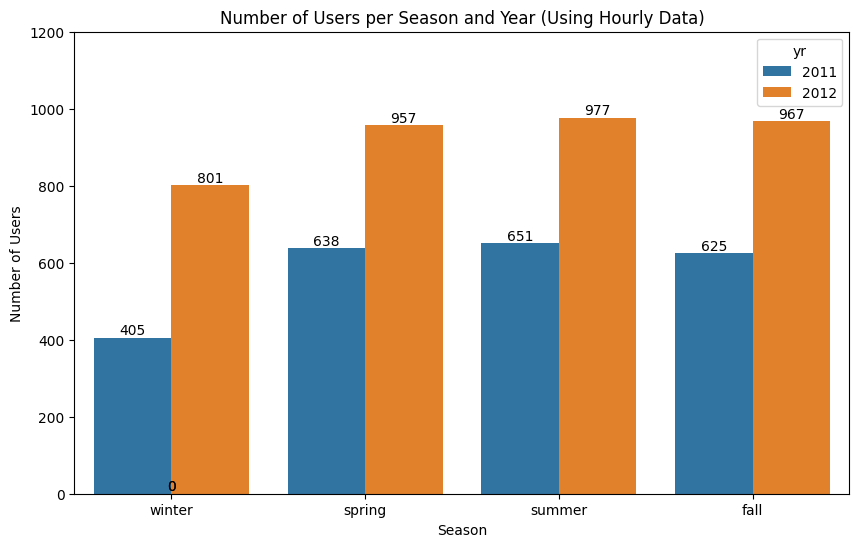

In [73]:
agg_df = hour_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()

# Plotting the bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='season', y='cnt', hue='yr', data=agg_df)
plt.title('Number of Users per Season and Year (Using Hourly Data)')
plt.xlabel('Season')
plt.ylabel('Number of Users')
plt.ylim(0, 1200)

# Adding the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',  # Correct vertical alignment
                fontsize=10, color='black')

plt.show()

The bar chart shows that bike rentals peak in <b>the summer and fall,</b> likely due to favorable weather. The data also indicates a rise in rentals from 2011 to 2012, suggesting growing popularity, possibly due to better infrastructure or increased awareness. While summer is the peak season, fall also sees strong demand due to milder weather. Overall, understanding these seasonal trends can help operators optimize operations and marketing strategies during peak times.

<h5><b>Using daily data (day_df)</b></h5>

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/2568757159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df2 = day_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()


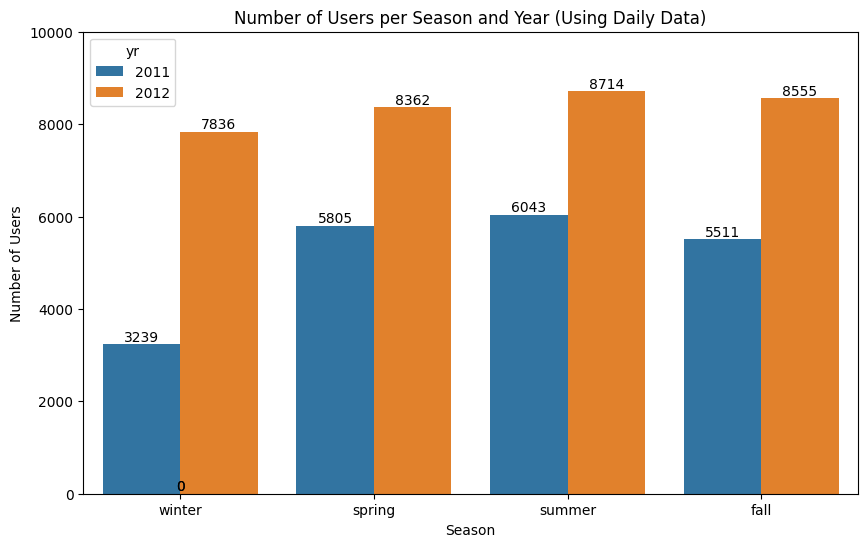

In [74]:
agg_df2 = day_df.groupby(["season", "yr"]).agg({"cnt": "max"}).reset_index()

# Plotting the bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='season', y='cnt', hue='yr', data=agg_df2)
plt.title('Number of Users per Season and Year (Using Daily Data)')
plt.xlabel('Season')
plt.ylabel('Number of Users')
plt.ylim(0, 10000)

# Adding the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',  # Correct vertical alignment
                fontsize=10, color='black')

plt.show()

The bar chart reveals that bike rentals peak in <b>the warmer summer and fall months,</b> likely due to favorable weather. The data also shows a rise in bike rental usage from 2011 to 2012, indicating growing popularity, possibly due to increased awareness or improved infrastructure. While summer remains the busiest season, fall also sees notable demand due to milder weather. Understanding these seasonal trends can help operators optimize operations and marketing strategies during peak periods.

<h3><b>Are there significant differences in usage based on weather?</b></h3>

<h5><b>Using hourly data (hour_df)</b></h5>

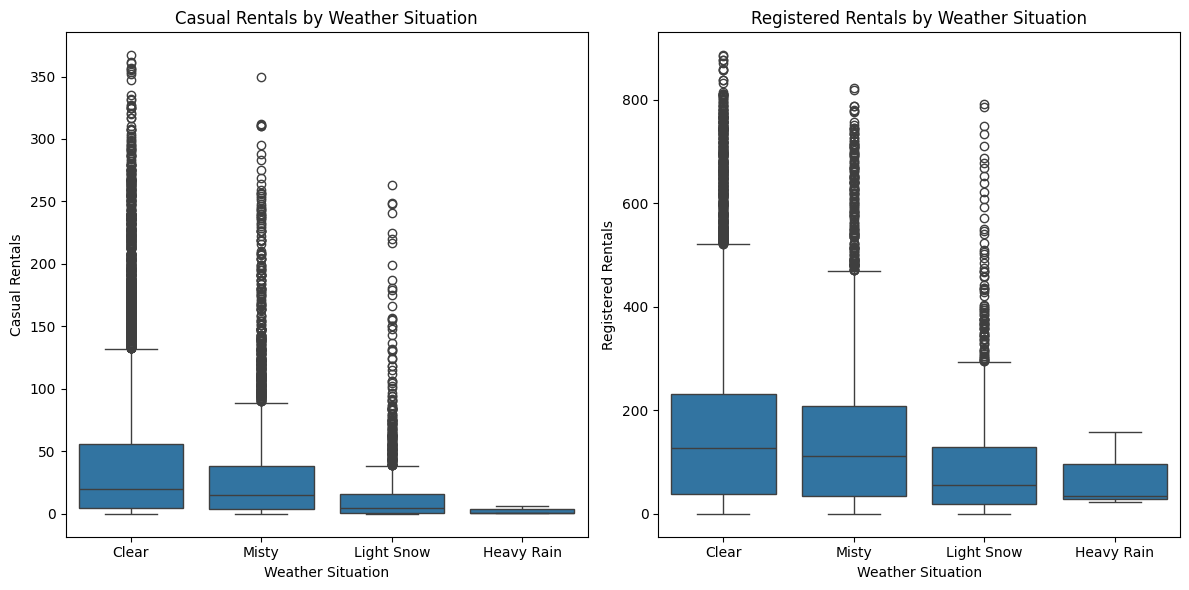

In [75]:
# Assuming hour_df is your dataframe and 'weathersit' is the column for weather situation
plt.figure(figsize=(12, 6))

# Box plot for casual bike rentals based on weather situation
plt.subplot(1, 2, 1)
sns.boxplot(x='weathersit', y='casual', data=hour_df)
plt.title('Casual Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Casual Rentals')

# Box plot for registered bike rentals based on weather situation
plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='registered', data=hour_df)
plt.title('Registered Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Registered Rentals')

# Show the plots
plt.tight_layout()
plt.show()


The box plots reveal that <b>weather significantly affects bike rentals.</b> Clear and misty conditions are the most favorable for both casual and registered users, whereas heavy rain and light snow considerably lower rentals, especially for casual users. Registered users, however, display more variability in their rental patterns, with a wider range of usage across various weather conditions.

<h5><b>Using daily data (day_df)</b></h5>

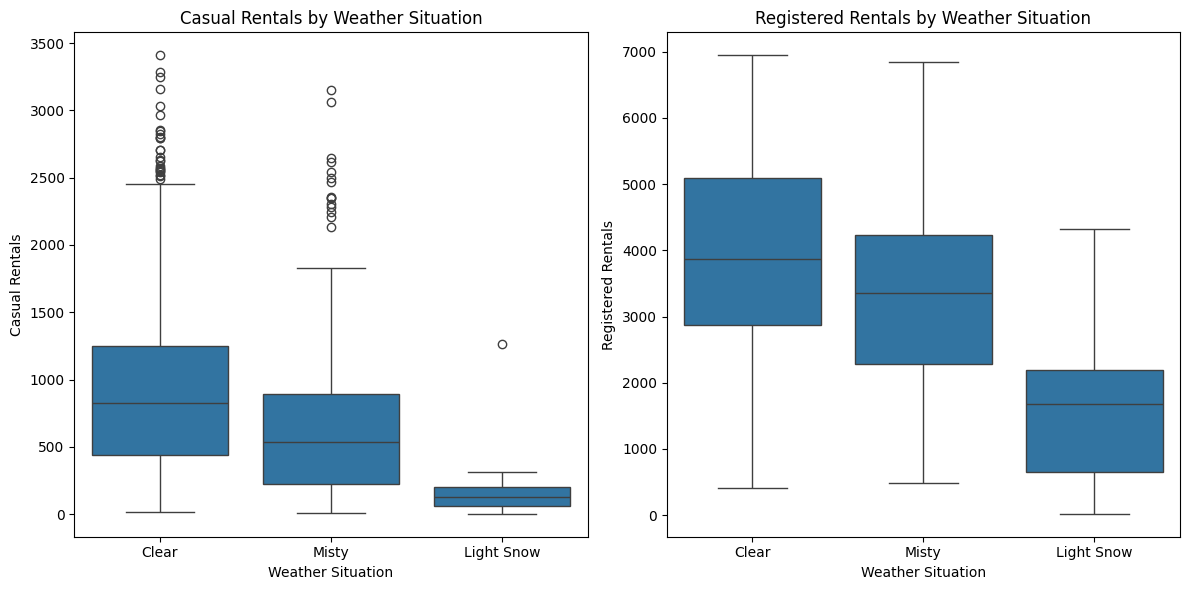

In [76]:
# Assuming hour_df is your dataframe and 'weathersit' is the column for weather situation
plt.figure(figsize=(12, 6))

# Box plot for casual bike rentals based on weather situation
plt.subplot(1, 2, 1)
sns.boxplot(x='weathersit', y='casual', data=day_df)
plt.title('Casual Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Casual Rentals')

# Box plot for registered bike rentals based on weather situation
plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='registered', data=day_df)
plt.title('Registered Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Registered Rentals')

# Show the plots
plt.tight_layout()
plt.show()


The box plots demonstrate that weather conditions play a significant role in bike rentals. Clear and misty weather are ideal for both casual and registered users, whereas heavy rain and light snow notably lower rentals, especially for casual users. Registered users show more fluctuation in their rental patterns, with a wider range of rentals across various weather conditions.

<h3><b>What is the proportion of casual vs. registered users?</b></h3>

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/42584054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props_df = day_df.groupby(["yr"]).agg({"casual": "sum", "registered": "sum"}).reset_index()


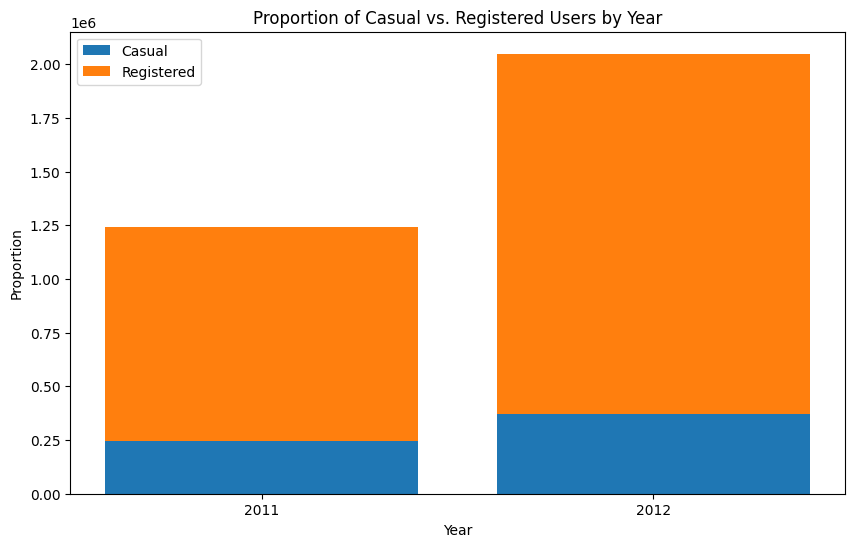

In [84]:
props_df = day_df.groupby(["yr"]).agg({"casual": "sum", "registered": "sum"}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(props_df['yr'], props_df['casual'], label='Casual')
plt.bar(props_df['yr'], props_df['registered'], label='Registered', bottom=props_df['casual'])
plt.title('Proportion of Casual vs. Registered Users by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show()

Based on the graph, we can observe a shift in the proportion of casual and registered bike users between 2011 and 2012. In 2011, casual users made up a larger proportion of the total user base, while registered users were more prevalent in 2012. While it's difficult to provide exact figures without the underlying data, we can estimate that the proportion of casual users decreased from approximately 30% in 2011 to around 20% in 2012. Conversely, the proportion of registered users increased from about 70% in 2011 to 80% in 2012. This suggests a growing trend towards registered bike usage over time.

<h3><b>How do bike rental counts differ between the years 2011 and 2012?</b></h3>

<h5><b>Using hourly data (hour_df)</b></h5>

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/1930011930.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_rentals = day_df.groupby('yr')['cnt'].sum()


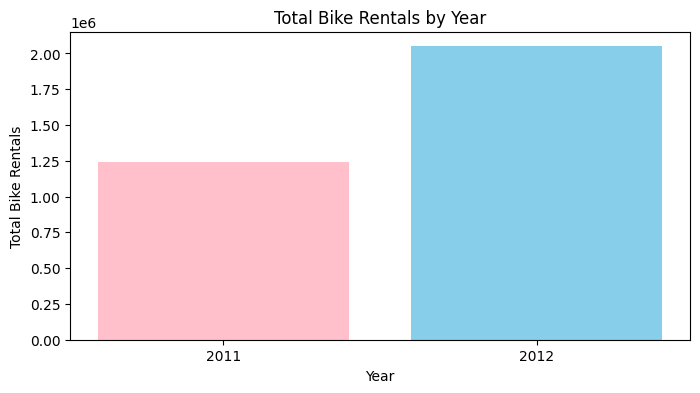

In [78]:
yearly_rentals = day_df.groupby('yr')['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(yearly_rentals.index, yearly_rentals.values, color=['pink', 'skyblue'])
plt.xlabel('Year')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Year')
plt.show()

The graph shows that bike rentals increased a lot from 2011 to 2012. This means that more people are using bike sharing services.

<h3><b>Is there a correlation between temperature and total bike rentals?</b></h3>

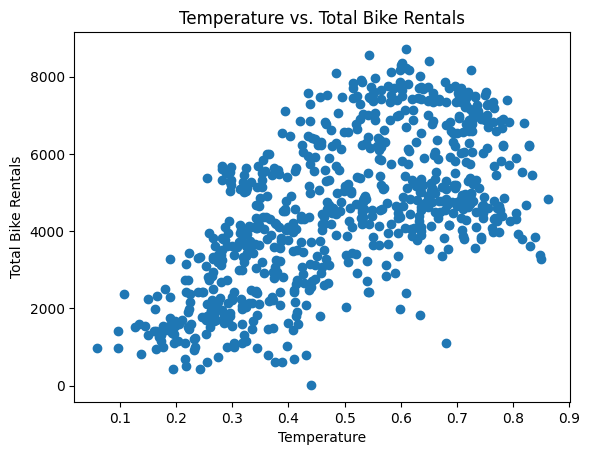

In [79]:
plt.scatter(day_df['temp'], day_df['cnt'])
plt.title('Temperature vs. Total Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

The graph shows that there is a relationship between temperature and the number of bikes rented. When it's warmer, more people rent bikes.

<h3><b>What is the number of rentals at certain hours?</b></h3>

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_9316/4030894806.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rentals = hour_df.groupby('hr')['cnt'].sum()


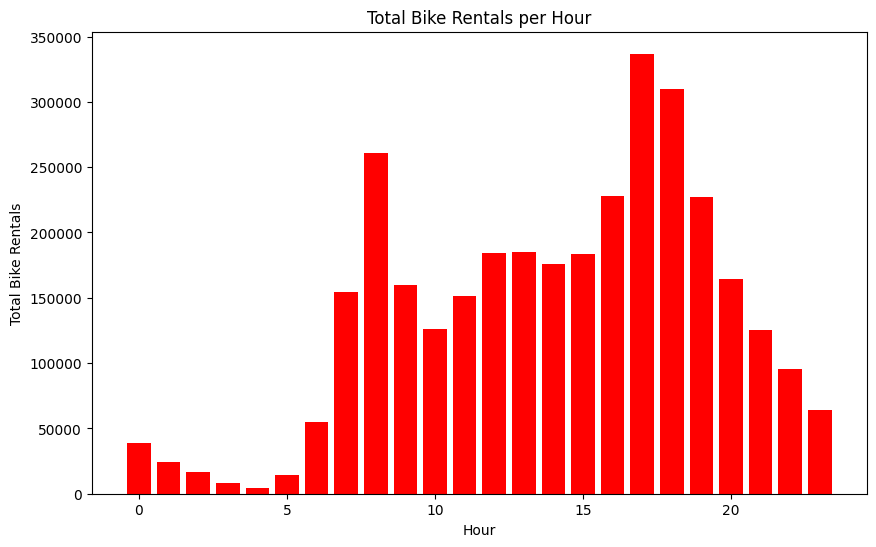

In [80]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(hourly_rentals.index, hourly_rentals.values, color='red')
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.show()

Bike sharing sees its highest usage during the evening rush hour and morning commute, suggesting that a large number of people find bikes to be an efficient and convenient option for their daily commutes. 

<h1><b>Conclusion</b></h1>

1. How does the seasonality affect bike rentals?
<b>Based on hour_df data,</b> there was a general increase in the number of users from 2011 to 2012. Spring and summer consistently emerged as the busiest seasons in both years, while winter experienced the lowest user activity.
<b>Based on day_df data,</b> there was a general increase in the number of users from 2011 to 2012, with the exception of winter. Spring and summer consistently emerged as the busiest seasons in both years.

2. Are there significant differences in usage based on weather?
<b>Based on hour_df data,</b> registered bike users have more consistent rentals than casual users, with less variation across weather conditions. Casual rentals are more influenced by weather, with higher numbers in clear weather and lower in heavy rain.
<b>Based on day_df data,</b> Bike rentals peak in clear weather and drop in misty and snowy conditions. Casual riders are more weather-sensitive with higher variability, while registered users rent more consistently, likely due to commuting.

3. What is the proportion of casual vs. registered users?
It shows a significant increase in registered users from 2011 to 2012, while the proportion of casual users decreased. This suggests a shift in user preferences towards registered memberships over time. 

4. How do bike rental counts differ between the years 2011 and 2012?
It shows a significant increase in bike rentals from 2011 to 2012. The total number of bike rentals in 2012 is approximately twice that of 2011.

5. Is there a correlation between temperature and total bike rentals?
Yes, there is positive correlation between temperature and total bike rentals. As temperature increases, the number of bike rentals tends to increase as well, indicating a general relationship between the two variables.

6. What is the number of rentals at certain hours?
The peak rental times are between 16 and 19 hours, with the highest number of rentals occurring at 17 hours. Rentals are significantly lower during the early morning and late evening hours.